In [354]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-prices/CarPrice_Assignment.csv
/kaggle/input/car-prices/Data Dictionary - carprices.xlsx


In [355]:
dataset= pd.read_csv('/kaggle/input/car-prices/CarPrice_Assignment.csv',index_col='car_ID')
dataset

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0


In [356]:
#changing the categorical columns to numerical columns in the dataset
categorical_columns = dataset.select_dtypes(object).columns
categorical_columns_list = categorical_columns.tolist()
categorical_columns_list.insert(0, 'symboling')
categorical_columns = pd.Index(categorical_columns_list)


for column in categorical_columns:
    mean_target = dataset.groupby(column)['price'].transform('mean')
    dataset[column] = mean_target
dataset

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,17221.296296,13495.0,12999.7982,12611.270833,12989.924078,21890.500000,19910.809211,12961.097361,88.6,168.8,...,130,17754.60284,3.47,2.68,9.0,111,5000,21,27,13495.0
2,17221.296296,16500.0,12999.7982,12611.270833,12989.924078,21890.500000,19910.809211,12961.097361,88.6,168.8,...,130,17754.60284,3.47,2.68,9.0,111,5000,21,27,16500.0
3,10037.907407,16500.0,12999.7982,12611.270833,12989.924078,10376.652386,19910.809211,12961.097361,94.5,171.2,...,152,17754.60284,2.68,3.47,9.0,154,5000,19,26,16500.0
4,10109.281250,13950.0,12999.7982,12611.270833,13501.152174,14344.270833,9239.308333,12961.097361,99.8,176.6,...,109,17754.60284,3.19,3.40,10.0,102,5500,24,30,13950.0
5,10109.281250,17580.0,12999.7982,12611.270833,13501.152174,14344.270833,11087.463000,12961.097361,99.4,176.6,...,136,17754.60284,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,17330.681818,14892.5,12999.7982,12611.270833,13501.152174,14344.270833,19910.809211,12961.097361,109.1,188.8,...,141,17754.60284,3.78,3.15,9.5,114,5400,23,28,16845.0
202,17330.681818,16230.0,12999.7982,16298.166676,13501.152174,14344.270833,19910.809211,12961.097361,109.1,188.8,...,141,17754.60284,3.78,3.15,8.7,160,5300,19,25,19045.0
203,17330.681818,18735.0,12999.7982,12611.270833,13501.152174,14344.270833,19910.809211,12961.097361,109.1,188.8,...,173,17754.60284,3.58,2.87,8.8,134,5500,18,23,21485.0


In [357]:
#finding the correlation of all the columns with price

correlation=dataset.corr()['price']
correlation = correlation.drop_duplicates()
correlation=correlation.drop('price')
correlation

symboling           0.368466
CarName             0.977218
fueltype            0.105679
aspiration          0.177926
doornumber          0.031835
carbody             0.372030
drivewheel          0.640673
enginelocation      0.324973
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginetype          0.470384
cylindernumber      0.797268
enginesize          0.874145
fuelsystem          0.597700
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

In [358]:
#sorting correlation by absolute values while maintaining its negatives
sorted_correlation = correlation.iloc[np.argsort(-abs(correlation))]
sorted_correlation

CarName             0.977218
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
cylindernumber      0.797268
carwidth            0.759325
highwaympg         -0.697599
citympg            -0.685751
carlength           0.682920
drivewheel          0.640673
fuelsystem          0.597700
wheelbase           0.577816
boreratio           0.553173
enginetype          0.470384
carbody             0.372030
symboling           0.368466
enginelocation      0.324973
aspiration          0.177926
carheight           0.119336
fueltype            0.105679
peakrpm            -0.085267
stroke              0.079443
compressionratio    0.067984
doornumber          0.031835
Name: price, dtype: float64

In [359]:
#splitting the data into testing and training data
split_ratio = 0.8
split_index = int(len(dataset) * split_ratio)

train_data = dataset.iloc[:split_index]
test_data = dataset.iloc[split_index:]
dataset


,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,,,,,,,,,,,,,,,,,,,,,
1,17221.296296,13495.0,12999.7982,12611.270833,12989.924078,21890.500000,19910.809211,12961.097361,88.6,168.8,...,130,17754.60284,3.47,2.68,9.0,111,5000,21,27,13495.0
2,17221.296296,16500.0,12999.7982,12611.270833,12989.924078,21890.500000,19910.809211,12961.097361,88.6,168.8,...,130,17754.60284,3.47,2.68,9.0,111,5000,21,27,16500.0
3,10037.907407,16500.0,12999.7982,12611.270833,12989.924078,10376.652386,19910.809211,12961.097361,94.5,171.2,...,152,17754.60284,2.68,3.47,9.0,154,5000,19,26,16500.0
4,10109.281250,13950.0,12999.7982,12611.270833,13501.152174,14344.270833,9239.308333,12961.097361,99.8,176.6,...,109,17754.60284,3.19,3.40,10.0,102,5500,24,30,13950.0
5,10109.281250,17580.0,12999.7982,12611.270833,13501.152174,14344.270833,11087.463000,12961.097361,99.4,176.6,...,136,17754.60284,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201,17330.681818,14892.5,12999.7982,12611.270833,13501.152174,14344.270833,19910.809211,12961.097361,109.1,188.8,...,141,17754.60284,3.78,3.15,9.5,114,5400,23,28,16845.0
202,17330.681818,16230.0,12999.7982,16298.166676,13501.152174,14344.270833,19910.809211,12961.097361,109.1,188.8,...,141,17754.60284,3.78,3.15,8.7,160,5300,19,25,19045.0
203,17330.681818,18735.0,12999.7982,12611.270833,13501.152174,14344.270833,19910.809211,12961.097361,109.1,188.8,...,173,17754.60284,3.58,2.87,8.8,134,5500,18,23,21485.0


In [383]:
#separating x and y for training and testing dataset
selected_features=sorted_correlation.index[:10]

x_train = train_data[selected_features]
y_train = train_data['price']

x_test = test_data[selected_features]
y_test = test_data['price']
x_train

,CarName,enginesize,curbweight,horsepower,cylindernumber,carwidth,highwaympg,citympg,carlength,drivewheel
car_ID,,,,,,,,,,
1,13495.000000,130,2548,111,10285.754717,64.1,27,21,168.8,19910.809211
2,16500.000000,130,2548,111,10285.754717,64.1,27,21,168.8,19910.809211
3,16500.000000,152,2823,154,23671.833333,65.5,26,19,171.2,19910.809211
4,13950.000000,109,2337,102,10285.754717,66.2,30,24,176.6,9239.308333
5,17580.000000,136,2824,115,21630.469727,66.4,22,18,176.6,11087.463000
...,...,...,...,...,...,...,...,...,...,...
160,9530.000000,110,2275,56,10285.754717,64.4,47,38,166.3,9239.308333
161,9366.333333,98,2094,70,10285.754717,64.4,47,38,166.3,9239.308333
162,9530.000000,98,2122,70,10285.754717,64.4,34,28,166.3,9239.308333


In [384]:
 #adding a column of ones to include the intercept term
x_train = np.c_[np.ones((x_train.shape[0], 1)), x_train]
x_test = np.c_[np.ones((x_test.shape[0], 1)), x_test]


In [385]:
y_train=y_train.values.reshape(train_data.shape[0],1)
y_test=y_test.values.reshape(test_data.shape[0],1)

In [386]:
def model(x,y,learning_rate,iteration):
    m=y.size
    theta = np.zeros((x.shape[1],1)) 
    cost_list=[]
    for i in range(iteration):
        y_pred = np.dot(x,theta) #prediction of y
        
        cost=(1/(2*m))*np.sum(np.square(y_pred-y)) #cost function
        
        d_theta = (1/m)*np.dot(x.T,y_pred-y)
        theta = theta - learning_rate*d_theta #gradient descent
        
        cost_list.append(cost) #to check if cost going down
        
        if(i%(iteration/10)==0):
            print("Cost is: ", cost)
    return theta,cost_list

In [446]:
#checking if the cost function is decreasing appropriately
iteration = 10000
learning_rate=0.000000002
theta,cost_list= model(x_train,y_train,learning_rate,iteration)

Cost is:  126649798.61184114
Cost is:  1346058.2299031757
Cost is:  1341619.2203959276
Cost is:  1339822.9814050435
Cost is:  1338786.864884544
Cost is:  1337970.3457412834
Cost is:  1337218.2318244537
Cost is:  1336485.9627888275
Cost is:  1335760.7414676573
Cost is:  1335038.8901354878


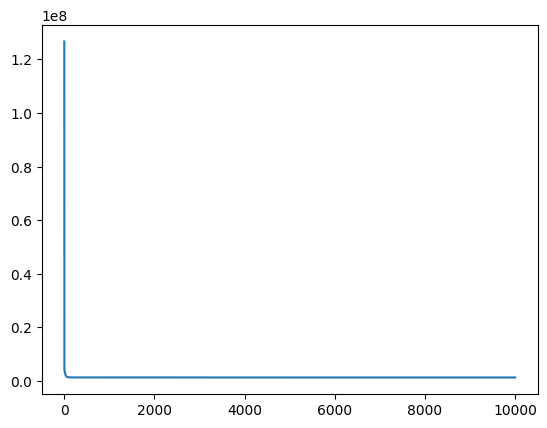

In [447]:
#plotting graph for cost function decreasing
rng = np.arange(0,iteration)
plt.plot(rng,cost_list)
plt.show()

In [448]:
#checking error for testing data
y_pred= np.dot(x_test,theta)
error_test=(1/y_test.size)*np.sum(np.abs(y_pred-y_test))

#checking error for training data
y_pred= np.dot(x_train,theta)
error_train=(1/y_train.size)*np.sum(np.abs(y_pred-y_train))

In [449]:
#training accuracy
print("Training accuracy is =",100-(error_train/100),"%")

#test accuracy
print("Test accuracy is = ",100-(error_test/100),"%")

Training accuracy is = 90.88214860240022 %
Test accuracy is =  87.9494273418016 %
